<a href="https://colab.research.google.com/github/aishwarya-chandra/CVInternship/blob/main/make_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
data, target = make_moons(n_samples = 1000, noise = 0.03, random_state = 10)

In [ ]:
data[:5]

array([[ 1.56591316, -0.29369747],
       [ 1.93762628,  0.24461362],
       [ 0.07799892,  0.22819602],
       [ 0.48641306,  0.87434715],
       [ 1.04257757, -0.55144464]])

In [ ]:
target[:5]

array([1, 1, 1, 0, 1])

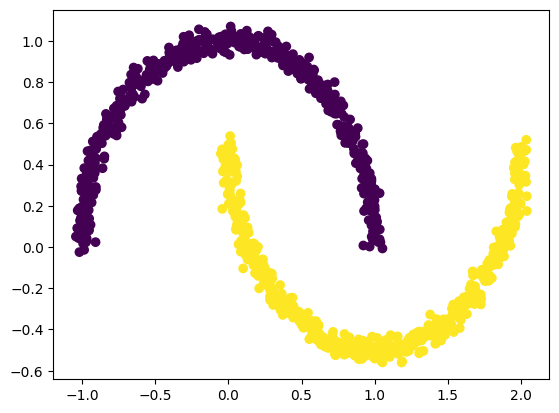

In [ ]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.show()

In [ ]:
# convert numpy array into tensor object
X = torch.from_numpy(data).type(torch.float)
y = torch.from_numpy(target).type(torch.float)

In [ ]:
# test size is 0.25 that means 25% data is reserved for testing purpose
# we apply deep learning on training data and then test our model on testing data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X.shape

torch.Size([1000, 2])

In [ ]:
x_train.shape

torch.Size([750, 2])

In [ ]:
#BUILDING MODEL
# setup GPU for deep learning model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
# nn.Module is a parent class of our Model class
class Model(nn.Module):
  #constructor of our class

  def __init__(self):
    #calling parent class constructor
    super().__init__()
    #create input layer
    #in_features - input neurons in our input layer
    #out_features - hidden layer neurons that is connected with input layer
    #nn.Linear - it applies linear equation : x.w + bias
    self.layer_1 = nn.Linear(in_features=2,out_features=4)
    self.layer_2 = nn.Linear(in_features=4,out_features=4)
    self.layer_3 = nn.Linear(in_features=4,out_features=1)
    self.activation = nn.ReLU()

  #feed forward
  def forward(self, input_data):
    #first we pass our input data to forward method
    #then layer_1 will recieve input data
    #then we pass layer_1 output to layer_2
    #then we return output that is coming out from layer_2
    x = self.activation(self.layer_1(input_data))
    x = self.activation(self.layer_2(x))
    return self.layer_3(x)

In [ ]:
model = Model().to(device) #object is created of class named Model

In [ ]:
model

Model(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)

In [ ]:

#loss using binary cross entropy
loss = nn.BCEWithLogitsLoss()
#optimization using stochastic gradient descent
#optimizer = torch.optim.SGD(params = model.parameters(), lr=0.1)
#lr= learning rate
#params = trainable parameters - weights and bias

optimizer = torch.optim.Adam(params = model.parameters(), lr=0.01)

In [ ]:
#Evaluation metric
def accuracy(y_true, y_pred):
  #will sum in correct_classification variable only if:
  #y_true =1, y_pred = 1
  #y_true =0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

In [ ]:
epochs = 230
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #training model
  model.train()

#apply feedforward
  y_logits = model(x_train).squeeze()
  #squeeze used to convert in 1-D
  #get predictions on training data
  y_pred = torch.round(torch.sigmoid(y_logits))
  #sigmoid - activation layer gives y_pred_probabilities
  #y_pred_probabilities are rounded off to give 0 or 1

  #now find out loss
  #apply bnary cross entropy to get loss
  train_loss = loss(y_logits, y_train)
  acc = accuracy(y_train, y_pred)

  #apply optimization - gradient descent
  optimizer.zero_grad()

  #backpropagation
  train_loss.backward()

  optimizer.step()
  #it applies step of learning rate and impliment again

  #model evaluation
  model.eval()

  with torch.inference_mode():
    y_pred_test = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_pred_test))
    test_loss = loss(y_pred_test, y_test)
    test_acc = accuracy(y_test, test_pred)
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {train_loss:.4f} | Acc : {acc:.2f} | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}")


Epoch : 0 | Loss : 0.7018 | Acc : 49.07 | Test Loss : 0.6981 | Test Acc : 52.80
Epoch : 10 | Loss : 0.6928 | Acc : 50.93 | Test Loss : 0.6932 | Test Acc : 47.20
Epoch : 20 | Loss : 0.6914 | Acc : 50.93 | Test Loss : 0.6932 | Test Acc : 47.20
Epoch : 30 | Loss : 0.6870 | Acc : 50.93 | Test Loss : 0.6873 | Test Acc : 47.20
Epoch : 40 | Loss : 0.6762 | Acc : 73.60 | Test Loss : 0.6741 | Test Acc : 79.60
Epoch : 50 | Loss : 0.6532 | Acc : 79.33 | Test Loss : 0.6490 | Test Acc : 82.00
Epoch : 60 | Loss : 0.6052 | Acc : 81.20 | Test Loss : 0.5984 | Test Acc : 83.20
Epoch : 70 | Loss : 0.5286 | Acc : 82.40 | Test Loss : 0.5238 | Test Acc : 83.60
Epoch : 80 | Loss : 0.4554 | Acc : 84.00 | Test Loss : 0.4544 | Test Acc : 84.00
Epoch : 90 | Loss : 0.3794 | Acc : 86.00 | Test Loss : 0.3724 | Test Acc : 85.20
Epoch : 100 | Loss : 0.3090 | Acc : 87.73 | Test Loss : 0.2938 | Test Acc : 88.80
Epoch : 110 | Loss : 0.2657 | Acc : 88.67 | Test Loss : 0.2469 | Test Acc : 89.60
Epoch : 120 | Loss : 0.2542

In [ ]:
x_train

tensor([[ 0.5829,  0.8607],
        [ 0.0846,  0.2164],
        [ 0.0297,  0.3099],
        ...,
        [ 0.0860,  0.9902],
        [-0.4354,  0.8688],
        [ 0.4937, -0.3229]])

In [ ]:
x_train.squeeze()

tensor([[ 0.5829,  0.8607],
        [ 0.0846,  0.2164],
        [ 0.0297,  0.3099],
        ...,
        [ 0.0860,  0.9902],
        [-0.4354,  0.8688],
        [ 0.4937, -0.3229]])

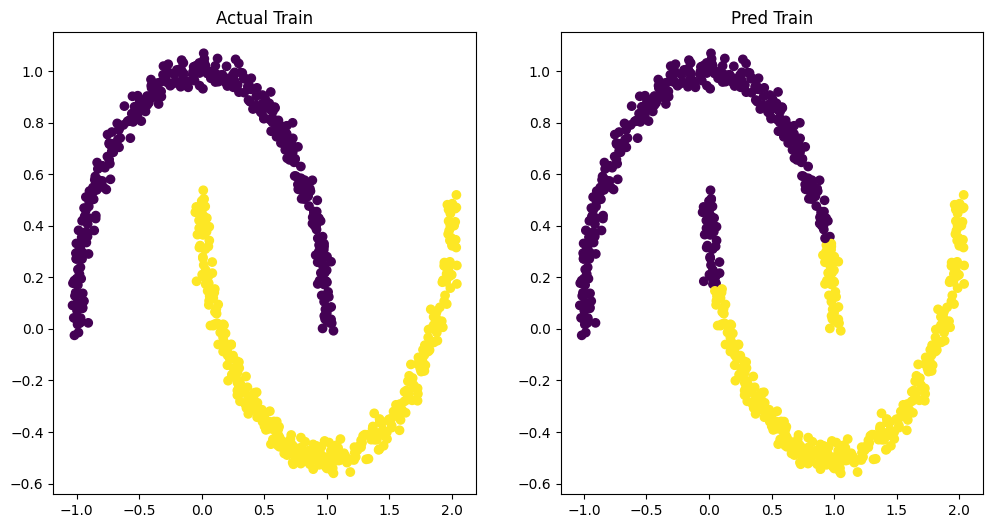

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Actual Train")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.subplot(1,2,2)
plt.title("Pred Train")
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred.detach().numpy())
plt.show()

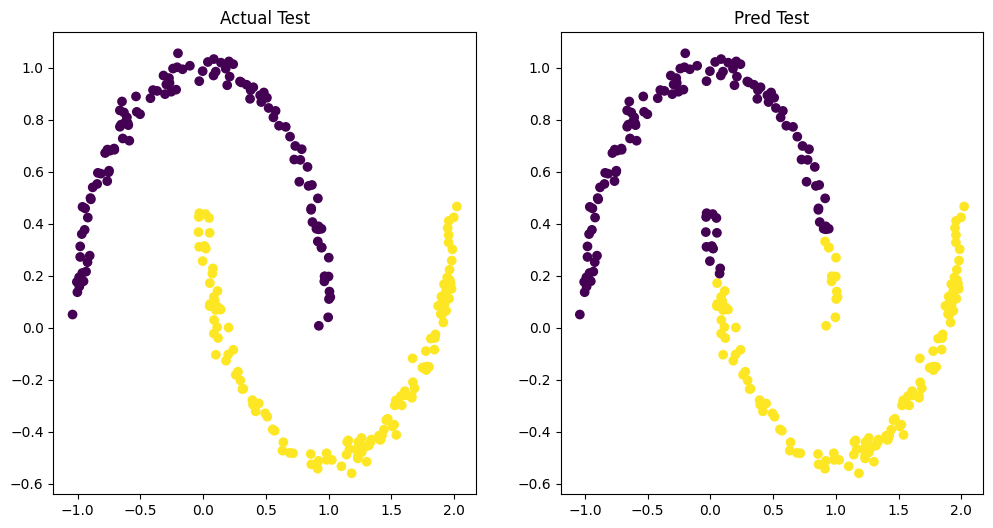

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Actual Test")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.subplot(1,2,2)
plt.title("Pred Test")
plt.scatter(x_test[:,0], x_test[:,1], c=test_pred.detach().numpy())
plt.show()